<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230415/9_3LSTM%EA%B3%BCGRU%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM과 GRU셀 <BR/>
멀리떨어져 있는 단어 정보를 인식하기 위함

#LSTM(Long Short-Term Memory)
* 단기기억을 오래하기 위함
* 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조(시그모이드 함수 사용[은닉상태만들때])
<bR/>
<br/>
* LSTM에서는 순환되는 상태가 2개임
* 은닉 말고 셀상태라고 부르는 값의 존재
* 셀 상태는 다음층으로 전달 되지 않고 LSTM셀에서 순환만 되는 값
* LSTM은 작은 셀을 여러개 포함하고 있는 큰 셀 같은데 입력과 은닉상태에 곱해지는 가중치값이 다르다는 점이 특징임
* 삭제 게이트, 입력게이트, 출력게이트가 있음
* 삭제게이트는 셀상태의 정보 제거

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 55ms/step - loss: 0.6926 - accuracy: 0.5232 - val_loss: 0.6919 - val_accuracy: 0.5468
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6902 - accuracy: 0.5849 - val_loss: 0.6885 - val_accuracy: 0.6196
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6844 - accuracy: 0.6458 - val_loss: 0.6794 - val_accuracy: 0.6602
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6586 - accuracy: 0.6842 - val_loss: 0.6233 - val_accuracy: 0.7124
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5955 - accuracy: 0.7194 - val_loss: 0.5855 - val_accuracy: 0.7160
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5692 - accuracy: 0.7347 - val_loss: 0.5646 - val_accuracy: 0.7326
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5486 - accuracy: 0.7509 - val_loss: 0.5491 - val_ac

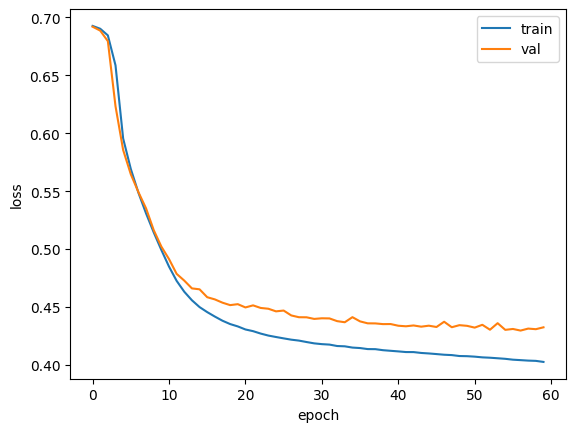

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#순환층에 드롭아웃 적용
* 훈련세트 과대적합을 막음

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 50ms/step - loss: 0.6923 - accuracy: 0.5346 - val_loss: 0.6916 - val_accuracy: 0.5736
Epoch 2/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6900 - accuracy: 0.5933 - val_loss: 0.6878 - val_accuracy: 0.6398
Epoch 3/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6813 - accuracy: 0.6426 - val_loss: 0.6691 - val_accuracy: 0.6804
Epoch 4/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6291 - accuracy: 0.6837 - val_loss: 0.5954 - val_accuracy: 0.6992
Epoch 5/100
313/313 [==============================] - 19s 62ms/step - loss: 0.5813 - accuracy: 0.7093 - val_loss: 0.5646 - val_accuracy: 0.7286
Epoch 6/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5564 - accuracy: 0.7327 - val_loss: 0.5435 - val_accuracy: 0.7486
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5383 - accuracy: 0.7473 - val_loss: 0.5271 - val_ac

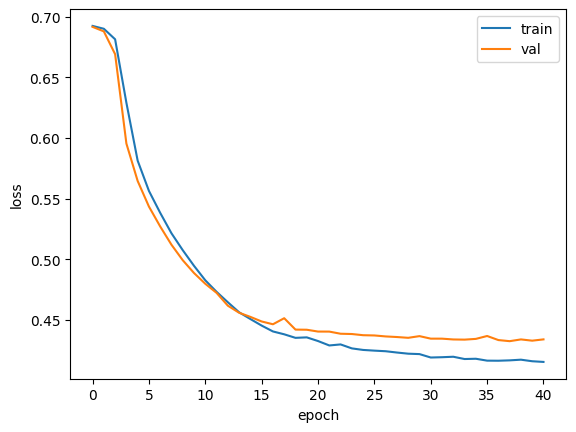

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#두개층 연결
* 연결할때 주의할 점
* 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요
* 앞쪽의 순환층이 모든 타임 스탭의 은닉상태를 출력해야함

In [8]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


KeyboardInterrupt: ignored

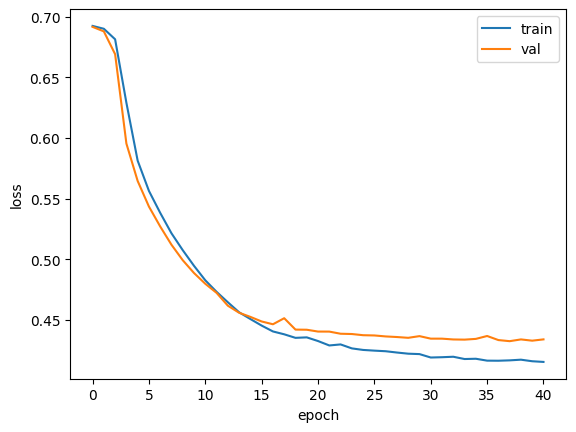

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#GRU 신경망 훈련


###GRU구조(Gated Recurrent Unit)
* LSTM의 간소 버전
* 마찬가지로 tanh활성화 함수 사용


In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Exception ignored in: <function _xla_gc_callback at 0x7f4267eed790>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 19s 54ms/step - loss: 0.6928 - accuracy: 0.5099 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 2/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6914 - accuracy: 0.5468 - val_loss: 0.6910 - val_accuracy: 0.5436
Epoch 3/100
190/313 [=====

KeyboardInterrupt: ignored

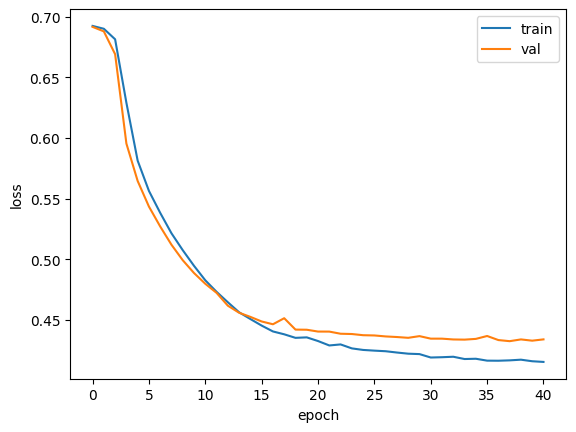

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 14s 16ms/step - loss: 0.4264 - accuracy: 0.7998


[0.4264238774776459, 0.799839973449707]